# MALIGNANT COMMENTS CLASSIFICATION
 
 
- Problem Statement

The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection.

Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.   
There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.

Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive.

# AIM:

Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying. 

# Data Set Description

The data set contains the training set, which has approximately 1,59,000 samples and the test set which contains nearly 1,53,000 samples. All the data samples contain 8 fields which includes Id, Comments, Malignant, Highly malignant, Rude, Threat, Abuse and Loathe. 
The label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment.   

- Columns are explained below after understanding: 

# Importing Library

In [1]:
#few important library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

#importing sklearn libraries
from sklearn.preprocessing import LabelEncoder,PowerTransformer, StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# imblearn library
from imblearn.over_sampling import SMOTE
from imblearn import under_sampling, over_sampling

from sklearn.model_selection import train_test_split

# importing warnings 
import warnings
warnings.filterwarnings("ignore")

In [2]:
import nltk
import string

from nltk.corpus import stopwords #plot
from nltk.tokenize import word_tokenize # tokenization

import nltk
from nltk.stem import PorterStemmer,WordNetLemmatizer
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer

## Loading DataSet

In [3]:
pd.set_option("display.max_columns",None)# max rows display
pd.set_option("display.max_rows",None) # max columns display

In [4]:
train_df=pd.read_csv(r"C:\Users\jitsa\Downloads\Malignant Comments-Classifier-Project\Malignant Comments Classifier Project\train.csv")
test_df=pd.read_csv(r"C:\Users\jitsa\Downloads\Malignant Comments-Classifier-Project\Malignant Comments Classifier Project\test.csv")

In [5]:
train_df.head(10)

id                                       comment_text  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
5  00025465d4725e87  "\n\nCongratulations from me as well, use the ...   
6  0002bcb3da6cb337       COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK   
7  00031b1e95af7921  Your vandalism to the Matt Shirvington article...   
8  00037261f536c51d  Sorry if the word 'nonsense' was offensive to ...   
9  00040093b2687caa  alignment on this subject and which are contra...   

   malignant  highly_malignant  rude  threat  abuse  loathe  
0          0                 0     0       0      0       0  
1          0                 0     0       0      0       0  
2          0                 0     0       0      0       0  
3          0                 0     0       0      0       0  
4          0                 0     0       0      0       0  
5          0                 0     0       0      0       0  
6          1                 1     1       0      1       0  
7          0                 0     0       0      0       0  
8          0                 0     0       0      0       0  
9          0                 0     0       0      0       0

In [6]:
train_df.tail(2)

id                                       comment_text  \
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        malignant  highly_malignant  rude  threat  abuse  loathe  
159569          0                 0     0       0      0       0  
159570          0                 0     0       0      0       0

In [7]:
test_df.head(5)

id                                       comment_text
0  00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1  0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2  00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3  00017563c3f7919a  :If you have a look back at the source, the in...
4  00017695ad8997eb          I don't anonymously edit articles at all.

In [8]:
train_df.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

##  About Columns


1. Id - Id stands for identification,Here An unique id aligned with each comment text. 
2. Comment Text - A verbal or written remark expressing an opinion or reaction Here It includes the comment text. 
3. Malignant - Malignancy is the tendency of a medical condition to become progressively worse Here It is a column with binary values depicting which comments are malignant in nature. 
4. Highly Malignant - Labels for highly malignant text. 
5. Rude - Labels for comments that are rude in nature. 
6. Threat - Threatening context in the comments.
7. Abuse - Binary column with labels with abusive behaviour.
8. Loathe - Label to comments that are full of loathe and hatred. 

# About Data Set

In [9]:
print("About Train Data Set :","\nDataType ",type(train_df),"\nShape ",train_df.shape,"\nSize ",train_df.size,)

About Train Data Set : 
DataType  <class 'pandas.core.frame.DataFrame'> 
Shape  (159571, 8) 
Size  1276568


In [10]:
print("Test Data_set :","\nData Type",type(test_df),"\nTest Shape ",test_df.shape,"\nTest Size ",test_df.size)

Test Data_set : 
Data Type <class 'pandas.core.frame.DataFrame'> 
Test Shape  (153164, 2) 
Test Size  306328


## About Data Set

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [12]:
# About Test Data set
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


## Observation 

#### 1. Train Data_set

* Total Integer columns = 6
* Total Object Columns= 2
* Memory size= 9.8 MB

#### 2. Test Data_set

* Total Object columns= 2
* Memory Size= 2.4 MB

# Unique Values

In [13]:
# train dataset
unique_train=pd.DataFrame(data={"Unique Values":train_df.nunique()})
unique_train

Unique Values
id                       159571
comment_text             159571
malignant                     2
highly_malignant              2
rude                          2
threat                        2
abuse                         2
loathe                        2

In [14]:
# test data set:
unique_test= pd.DataFrame(data={"Unique Values":test_df.nunique()})
unique_test

Unique Values
id                   153164
comment_text         153164

## Observation 

#### 1. Train Data_set

- id	159571
- comment_text	159571
- malignant	2
- highly_malignant	2
- rude	2
- threat	2
- abuse	2
- loathe	2

#### 2. Test Data_set

- id	153164
- comment_text	153164


# Checking Unique contents in train dataset

In [15]:
for i in train_df.columns:
    if train_df[i].dtype=='object':
        print("Object Column", i)
        print(train_df[i].unique())
        print("****"*4)
        
    else:
        print("Integer Column",i)
        print(train_df[i].unique())
        print("****"*4)

Object Column id
['0000997932d777bf' '000103f0d9cfb60f' '000113f07ec002fd' ...
 'ffee36eab5c267c9' 'fff125370e4aaaf3' 'fff46fc426af1f9a']
****************
Object Column comment_text
["Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"
 "D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"
 "Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info."
 ...
 'Spitzer \n\nUmm, theres no actual article for prostitution ring.  - Crunch Captain.'
 'And it looks like it was actually you who put on the speedy to have the first version deleted now that

## Observation Shows:

- No nan values

In [16]:
train_df.duplicated().sum()

0

In [17]:
# deleting id column as its doesn't add any importance to dataset
train_df.drop(['id'],axis=1,inplace=True)

In [18]:
# deleting id column as in test dataset as it doesn't add any importance to dataset for prediction
test_df.drop(['id'],axis=1,inplace=True)

# Finding Null values

In [19]:
train_null_values=pd.DataFrame(data={" Total Missing Values ":train_df.isnull().sum()," Missing Percentage ":train_df.isnull().sum()/train_df.shape[0]})
train_null_values

Total Missing Values    Missing Percentage 
comment_text                           0                   0.0
malignant                              0                   0.0
highly_malignant                       0                   0.0
rude                                   0                   0.0
threat                                 0                   0.0
abuse                                  0                   0.0
loathe                                 0                   0.0

Text(0.5, 1.0, 'TRAIN GRAPH SHOWING NO NULL VALUES')

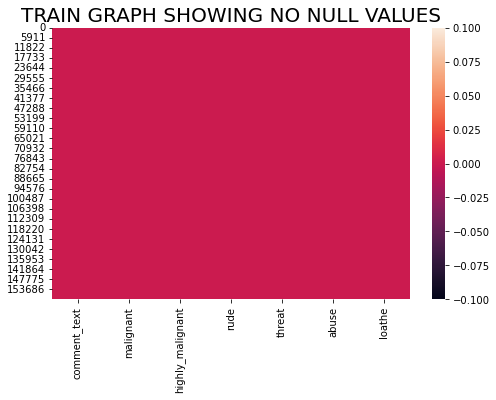

In [20]:
plt.figure(figsize=(8,5))
sns.heatmap(train_df.isnull())
plt.title("TRAIN GRAPH SHOWING NO NULL VALUES",fontsize=20)

# Observation(Train):

- Found no null values

In [21]:
# test data set
test_null_values=pd.DataFrame(data={" Total Missing Values ":test_df.isnull().sum()," Missing Percentage ":test_df.isnull().sum()/test_df.shape[0]})
test_null_values

Total Missing Values    Missing Percentage 
comment_text                       0                   0.0

Text(0.5, 1.0, 'TEST SHOWING NO NULL VALUES')

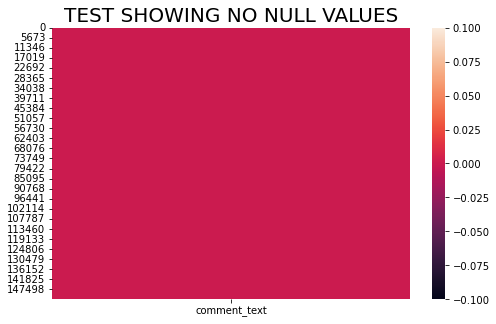

In [22]:
plt.figure(figsize=(8,5))
sns.heatmap(test_df.isnull())
plt.title("TEST SHOWING NO NULL VALUES",fontsize=20)

# Observation (Test):

- Found no null values

# Few comments

In [23]:
train_df.iloc[14]['comment_text']

"Oh, and the girl above started her arguments with me. She stuck her nose where it doesn't belong. I believe the argument was between me and Yvesnimmo. But like I said, the situation was settled and I apologized. Thanks,"

In [24]:
train_df['comment_text'][:200]

0      Explanation\nWhy the edits made under my usern...
1      D'aww! He matches this background colour I'm s...
2      Hey man, I'm really not trying to edit war. It...
3      "\nMore\nI can't make any real suggestions on ...
4      You, sir, are my hero. Any chance you remember...
5      "\n\nCongratulations from me as well, use the ...
6           COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK
7      Your vandalism to the Matt Shirvington article...
8      Sorry if the word 'nonsense' was offensive to ...
9      alignment on this subject and which are contra...
10     "\nFair use rationale for Image:Wonju.jpg\n\nT...
11     bbq \n\nbe a man and lets discuss it-maybe ove...
12     Hey... what is it..\n@ | talk .\nWhat is it......
13     Before you start throwing accusations and warn...
14     Oh, and the girl above started her arguments w...
15     "\n\nJuelz Santanas Age\n\nIn 2002, Juelz Sant...
16     Bye! \n\nDon't look, come or think of comming ...
17      REDIRECT Talk:Voydan Po

# EDA(Exploratory Data Analysis)

## 1. Univariate Analysis

malignant 
 0    144277
1     15294
Name: malignant, dtype: int64 



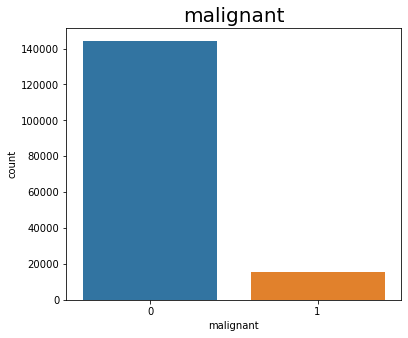

highly_malignant 
 0    157976
1      1595
Name: highly_malignant, dtype: int64 



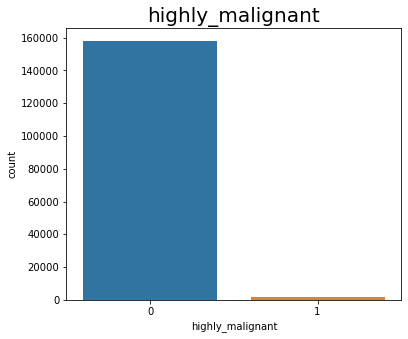

rude 
 0    151122
1      8449
Name: rude, dtype: int64 



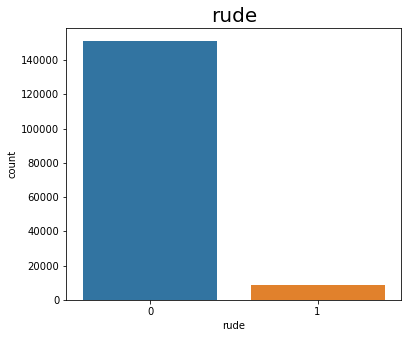

threat 
 0    159093
1       478
Name: threat, dtype: int64 



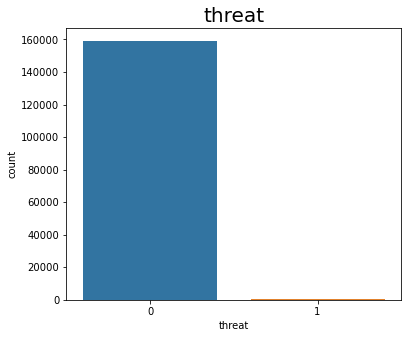

abuse 
 0    151694
1      7877
Name: abuse, dtype: int64 



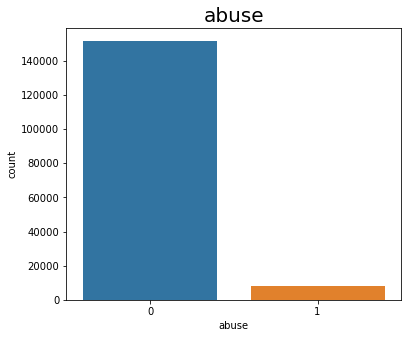

loathe 
 0    158166
1      1405
Name: loathe, dtype: int64 



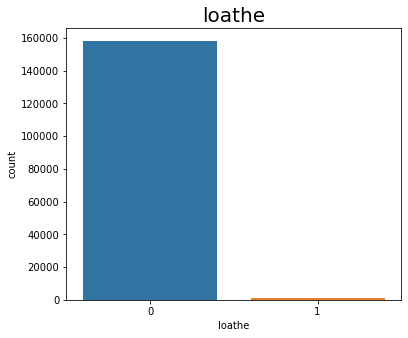

In [25]:
for i in train_df.columns:

    if train_df[i].dtype=='int64':
        print(i,'\n',train_df[i].value_counts(),'\n')
        plt.figure(figsize=(6,5))
        sns.countplot(data=train_df,x=i)
        plt.title(i,fontsize=20)
        plt.show()

# Observations:

- Column Malignant shows 1,44,277 are non Malignant and 15294 is Malignant.
- Highly Malignants column shows 1,57,976 are non Malignant and 1595 is highly Malignant
- Rude column shows 151122 are not rude where as 8449 are rude
- Threat column shows 159093 are not a threat but 478 shows threat
- abuse column shows 151694 are not a abuse and 7877 shows abuse
- loathe column shows 158166 are not a loathe and 1405 shows loath

# Bi-variate Analysis

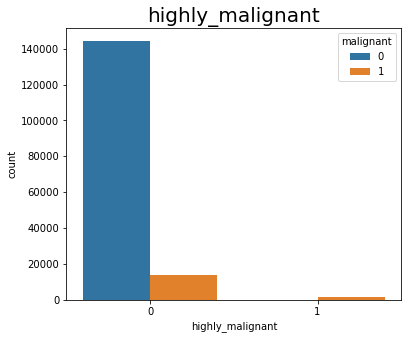

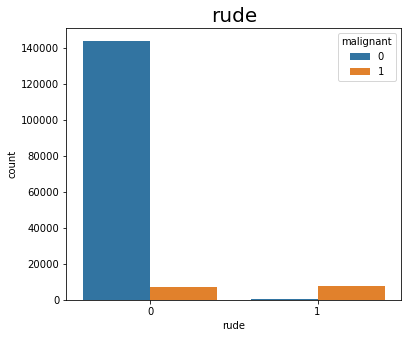

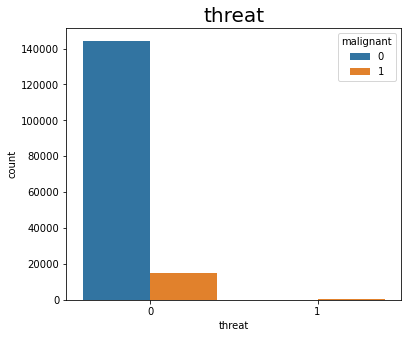

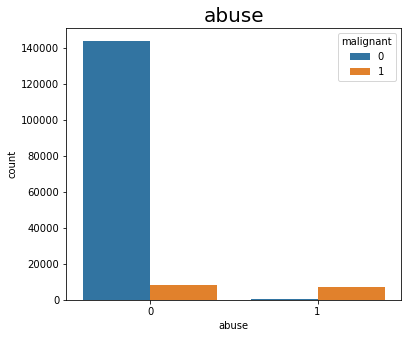

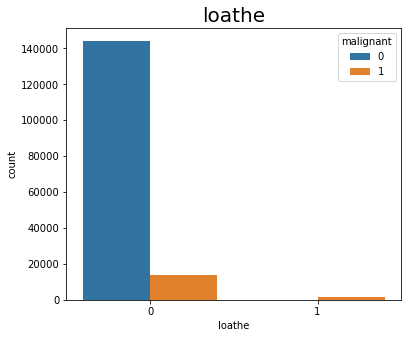

In [26]:
num=['highly_malignant', 'rude', 'threat','abuse', 'loathe']

for i in num:
    if train_df[i].dtype=='int64':
        plt.figure(figsize=(6,5))
        sns.countplot(data=train_df,x=i,hue='malignant')
        plt.title(i,fontsize=20)
        plt.show()

# Observation shows

- Non-Highly_Malignant,Rude,Non-threat,Non-abuse,Non-loathe are highly malignant.


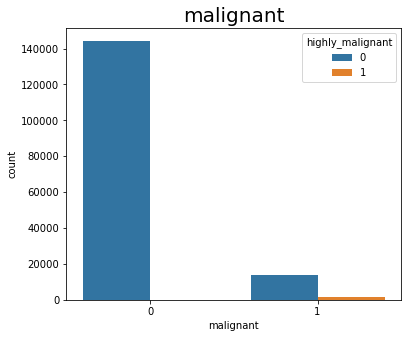

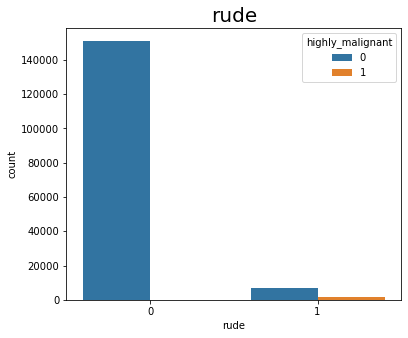

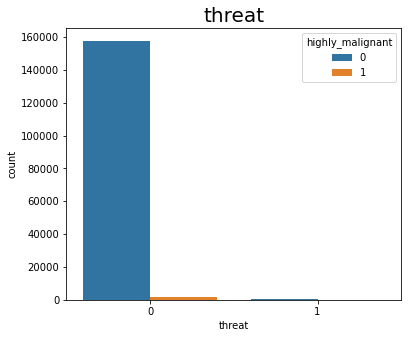

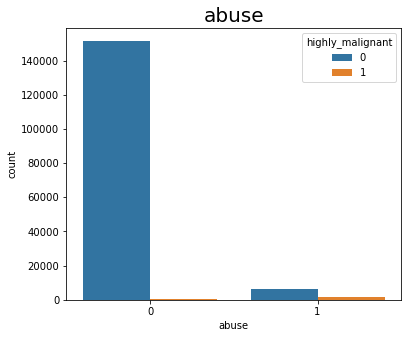

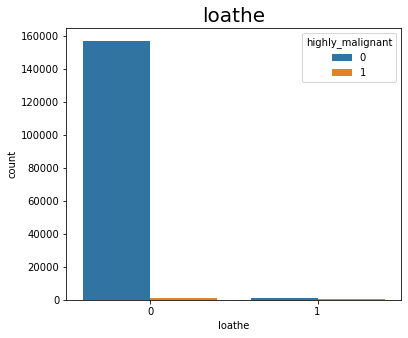

In [27]:
high_mal=['malignant', 'rude', 'threat', 'abuse', 'loathe']

for i in high_mal:
    if train_df[i].dtype=='int64':
        plt.figure(figsize=(6,5))
        sns.countplot(data=train_df,x=i,hue='highly_malignant')
        plt.title(i,fontsize=20)
        plt.show()

# Observation shows:

- Maximum malignant,rude are not highly malignant.
- Maximum non-threat,non-lathe,non-abuse Column shows high malignant.  

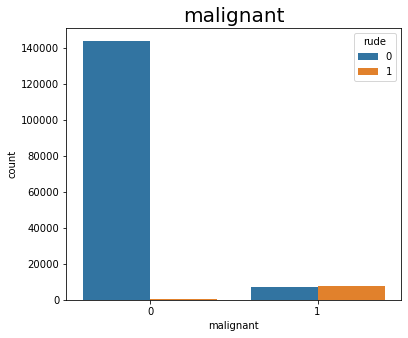

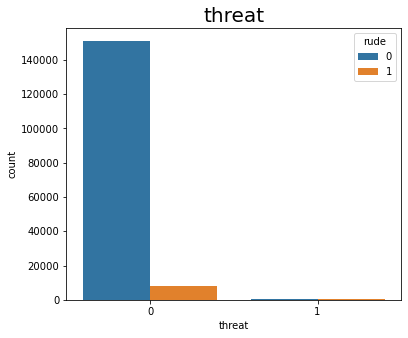

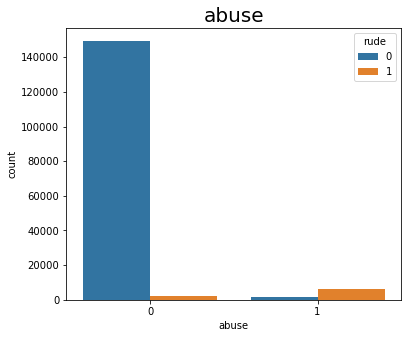

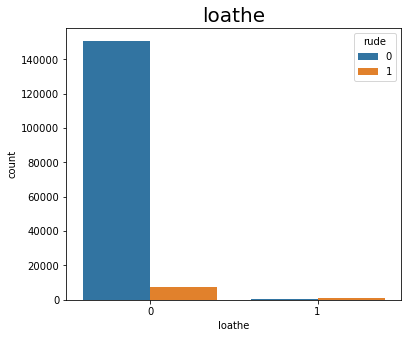

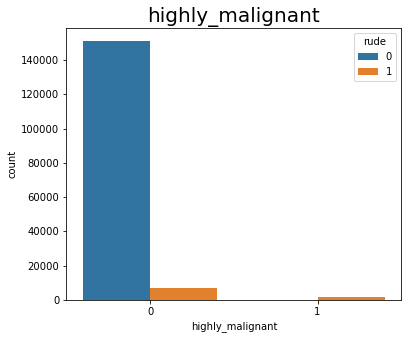

In [28]:
rude=['malignant', 'threat', 'abuse', 'loathe','highly_malignant']

for i in rude:
    if train_df[i].dtype=='int64':
        plt.figure(figsize=(6,5))
        sns.countplot(data=train_df,x=i,hue='rude')
        plt.title(i,fontsize=20)
        plt.show()

# Observation shows

- Maximum malignant are rude
- Maximum non threat are rude
- Maximum abuse are rude
- Maximum non-loathe are rude
- Maximum non highly-malignant are rude.

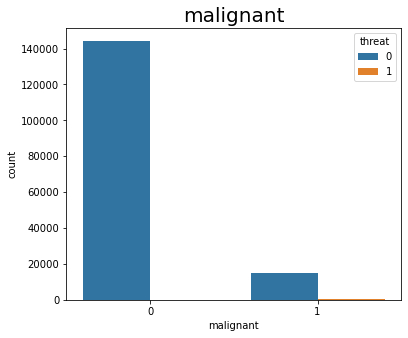

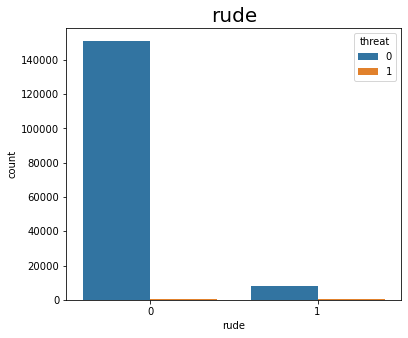

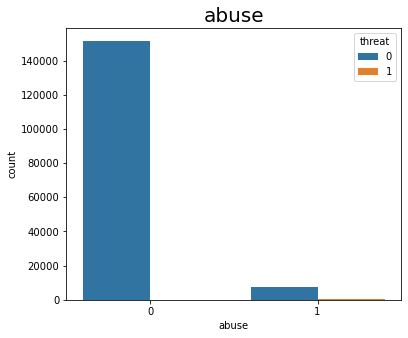

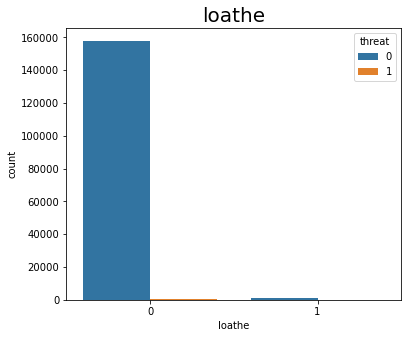

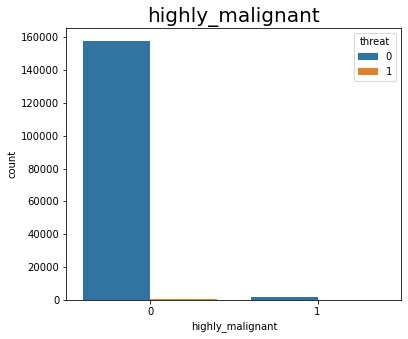

In [29]:
threat=['malignant', 'rude', 'abuse', 'loathe','highly_malignant']

for i in threat:
    if train_df[i].dtype=='int64':
        plt.figure(figsize=(6,5))
        sns.countplot(data=train_df,x=i,hue='threat')
        plt.title(i,fontsize=20)
        plt.show()

# Observation

- Maximum malignant,rude,abuse,highly_malignant comment showing low threat

- Non rude,loathe,highly malignant column shows they are a possiblethreat

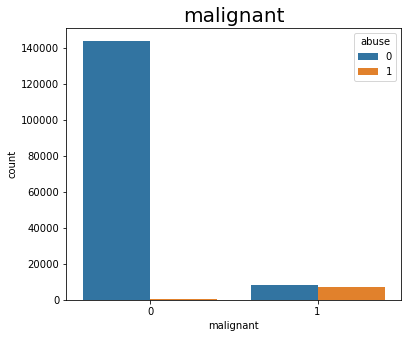

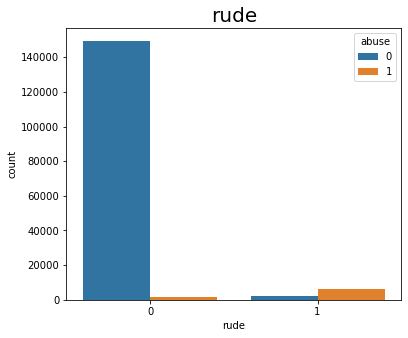

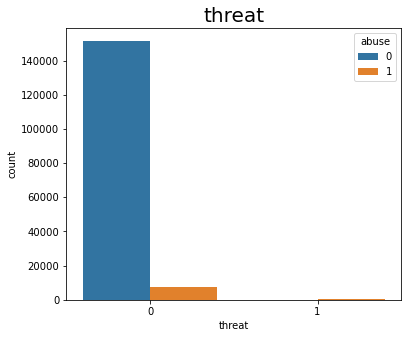

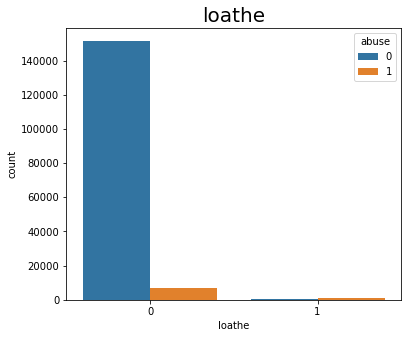

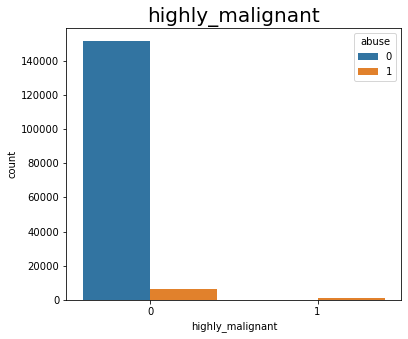

In [30]:
abuse=['malignant', 'rude', 'threat', 'loathe','highly_malignant']

for i in abuse:
    if train_df[i].dtype=='int64':
        plt.figure(figsize=(6,5))
        sns.countplot(data=train_df,x=i,hue='abuse')
        plt.title(i,fontsize=20)
        plt.show()

# Observation

- Maximum Malignent are abuser
- Maximum rude are abusive.
- Maximum malignent are non abuser.

- Maximum non-loathe,non-threat,non-highly_malignant column shows they are abusive

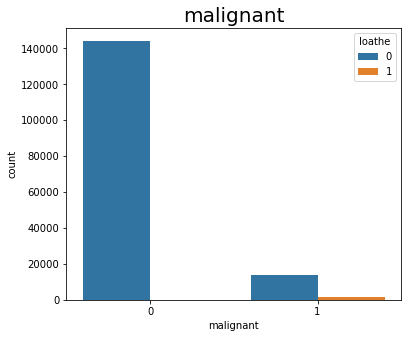

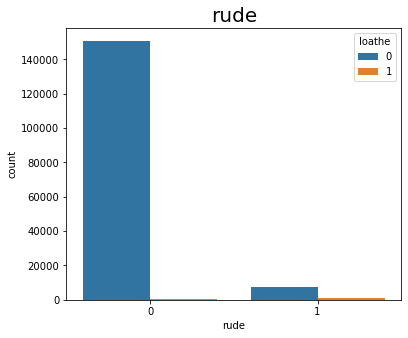

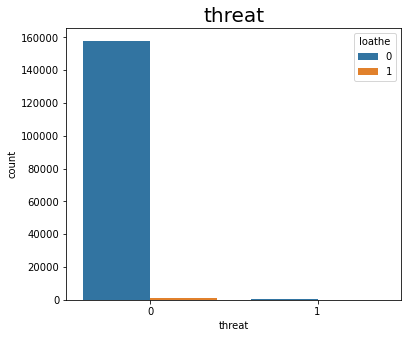

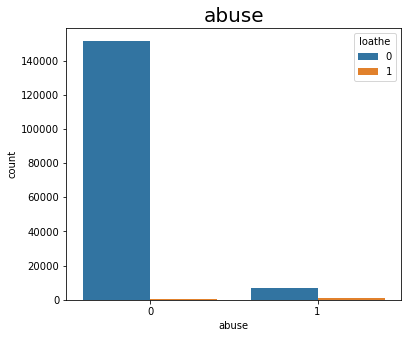

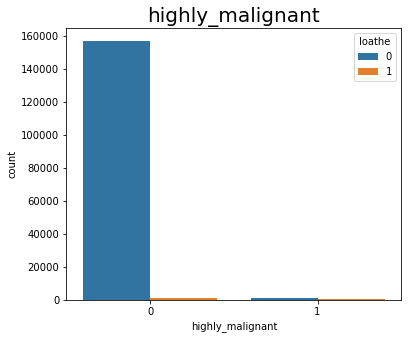

In [31]:
num=['malignant', 'rude', 'threat', 'abuse','highly_malignant']

for i in num:
    if train_df[i].dtype=='int64':
        plt.figure(figsize=(6,5))
        sns.countplot(data=train_df,x=i,hue='loathe')
        plt.title(i,fontsize=20)
        plt.show()

# Observation shows:

1. Malignants are not loathe.
2. Rude are less loathe
3. Non loathe having Maximum threat.
4. Abuse are less loathe.

In [32]:
train_df.columns

Index(['comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [33]:
# shows
train_df.groupby('malignant').first()

comment_text  \
malignant                                                      
0          Explanation\nWhy the edits made under my usern...   
1               COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK   

           highly_malignant  rude  threat  abuse  loathe  
malignant                                                 
0                         0     0       0      0       0  
1                         1     1       0      1       0

In [34]:
train_df.groupby(['malignant', 'highly_malignant']).sum()

rude  threat  abuse  loathe
malignant highly_malignant                             
0         0                  523      29    533     103
1         0                 6409     337   5973     989
          1                 1517     112   1371     313

In [35]:
train_df.groupby(['rude', 'threat','abuse', 'loathe']).sum()

malignant  highly_malignant
rude threat abuse loathe                             
0    0      0     0            5707                41
                  1             139                 3
            1     0            1229                14
                  1             141                 7
     1      0     0             124                11
                  1               8                 1
            1     0              17                 1
                  1               3                 0
1    0      0     0            1916               158
                  1              41                 6
            1     0            4789               989
                  1             883               265
     1      0     0              15                 4
            1     0             195                64
                  1              87                31

# Multi-variate Graph

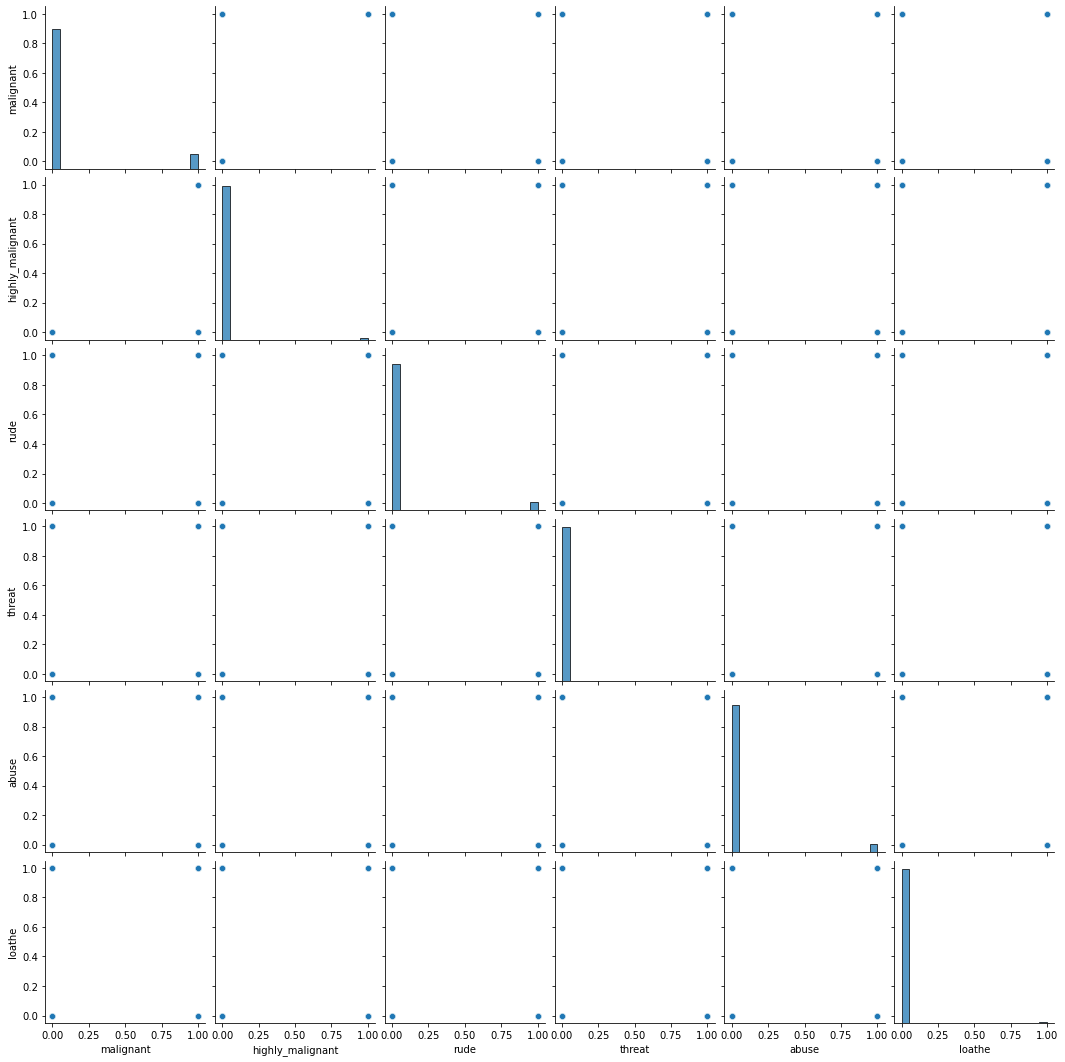

In [36]:
sns.pairplot(data=train_df)

# Descriptive Analysis :

In [37]:
train_df.describe()

malignant  highly_malignant           rude         threat  \
count  159571.000000     159571.000000  159571.000000  159571.000000   
mean        0.095844          0.009996       0.052948       0.002996   
std         0.294379          0.099477       0.223931       0.054650   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.000000          0.000000       0.000000       0.000000   
50%         0.000000          0.000000       0.000000       0.000000   
75%         0.000000          0.000000       0.000000       0.000000   
max         1.000000          1.000000       1.000000       1.000000   

               abuse         loathe  
count  159571.000000  159571.000000  
mean        0.049364       0.008805  
std         0.216627       0.093420  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         1.000000       1.000000

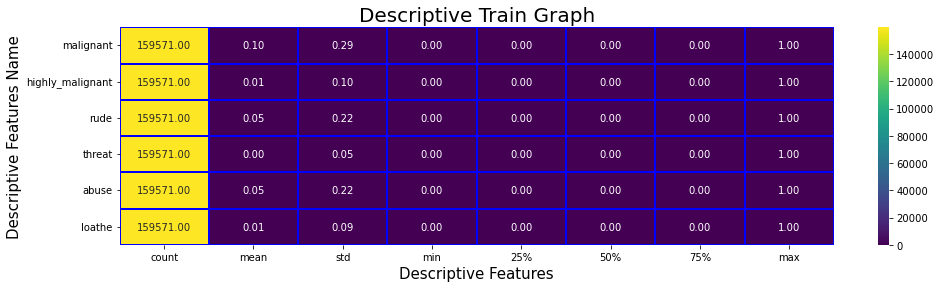

In [38]:
plt.figure(figsize=(16,4))
sns.heatmap(train_df.describe().T,annot=True,linewidths=0.2,linecolor='blue',fmt="0.2f",cmap="viridis")
plt.title("Descriptive Train Graph",fontsize=20)
plt.xlabel("Descriptive Features",fontsize=15)
plt.ylabel("Descriptive Features Name", fontsize=15)
plt.show()

# Observation Shows:

1. Null Values - No Null Values.
2. Right Skewness - malignant	highly_malignant	rude	threat	abuse	loathe
3. Left Skewness - Null
4. Std - Null
5. Outlier - Null

# Correlation Graph

In [39]:
train_df.corr()

malignant  highly_malignant      rude    threat     abuse  \
malignant          1.000000          0.308619  0.676515  0.157058  0.647518   
highly_malignant   0.308619          1.000000  0.403014  0.123601  0.375807   
rude               0.676515          0.403014  1.000000  0.141179  0.741272   
threat             0.157058          0.123601  0.141179  1.000000  0.150022   
abuse              0.647518          0.375807  0.741272  0.150022  1.000000   
loathe             0.266009          0.201600  0.286867  0.115128  0.337736   

                    loathe  
malignant         0.266009  
highly_malignant  0.201600  
rude              0.286867  
threat            0.115128  
abuse             0.337736  
loathe            1.000000

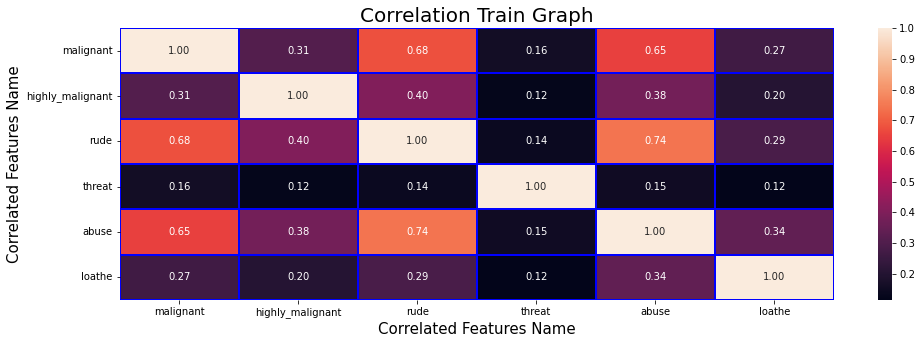

In [40]:
plt.figure(figsize=(16,5))
sns.heatmap(train_df.corr().T,annot=True,linewidths=0.2,linecolor='blue',fmt="0.2f",cmap="rocket")
plt.title("Correlation Train Graph",fontsize=20)
plt.xlabel("Correlated Features Name",fontsize=15)
plt.ylabel("Correlated Features Name", fontsize=15)
plt.show()

## Few Observation from Column:

- Malignant is 100 percentage correlated to itself.
- Higly_Malignant is 31 percentage correlated with malignant
- Rude is 68 percentage correlated with malignant
- Threat is 16 percentage correlated with malignant
- Abuse is 65 percentage correlated with malignant
- loathe is 27 percentage correlated with malignant

Note:
- Rude is 65 percentage positive highly correlated
- Threat is worse correlated.

# Data Preprocessing:

In [41]:
# calculating length of comments
train_df['length']= train_df['comment_text'].str.len()
train_df.sample()

comment_text  malignant  \
64941  Now available on Rogers \n\nOn channel 663.          0   

       highly_malignant  rude  threat  abuse  loathe  length  
64941                 0     0       0      0       0      41

In [42]:
# converting all comments into lower
train_df['comment_text']= train_df['comment_text'].str.lower()

In [43]:
#replacing all special symbols
train_df['comment_text']=train_df['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

In [44]:
#replacing urls with "web-address"

train_df['comment_text']=train_df['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

In [45]:
# Replace money symbols with money symbols (£ can by typed with ALT key + 156)

train_df['comment_text'] = train_df['comment_text'].str.replace(r'£|\$', 'dollers')

In [46]:
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
train_df['comment_text'] = train_df['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

In [47]:
# Replace numbers with 'numbr'

train_df['comment_text'] =train_df['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [48]:
#remove  punctation

train_df["comment_text"]=train_df["comment_text"].str.replace(r'[^\w\d\s]',"")

In [49]:
# replace extra space

train_df["comment_text"]=train_df["comment_text"].str.replace(r'^\s+',"")

In [50]:
#replacing leadning and trailing white space

train_df["comment_text"]=train_df["comment_text"].str.replace(r'^\s+|\s+?$'," ")

In [51]:
#removing \n

train_df["comment_text"]=train_df["comment_text"].str.replace("\n","")

In [52]:
train_df['comment_text'][:10]

0    explanationwhy the edits made under my usernam...
1    daww he matches this background colour im seem...
2    hey man im really not trying to edit war its j...
3    morei cant make any real suggestions on improv...
4    you sir are my hero any chance you remember wh...
5    congratulations from me as well use the tools ...
6         cocksucker before you piss around on my work
7    your vandalism to the matt shirvington article...
8    sorry if the word nonsense was offensive to yo...
9    alignment on this subject and which are contra...
Name: comment_text, dtype: object

### Sample checks

In [53]:
#sample check to check if any coments shows symbols.
train_df.iloc[56]['comment_text']

'tony sidaway is obviously a fistfuckee he loves an arm up his ass'

In [54]:
# sample check to check if any coments shows symbols.
train_df.iloc[55]['comment_text']

'stupid peace of shit stop deleting my stuff asshole go die and fall in a hole go to hell'

### Malignant column shows

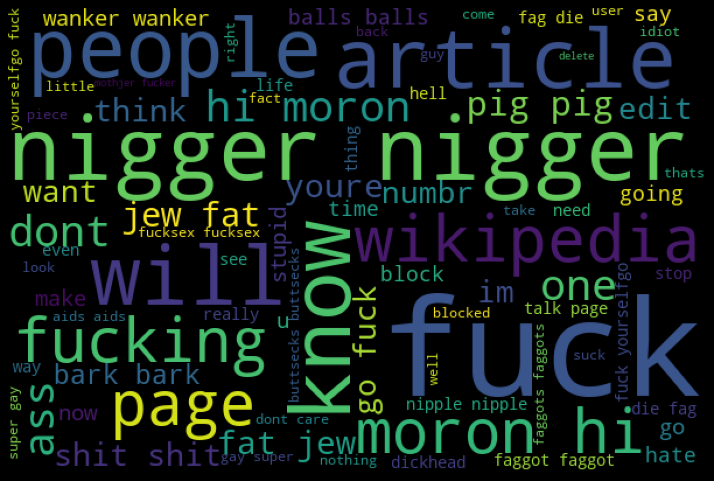

In [55]:
hams= train_df['comment_text'][train_df['malignant']==1]
#spam clouds
spam_cloud =WordCloud(width=600,height=400,background_color='black',max_words=80).generate("".join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=1)
plt.show()

### Rude column shows:

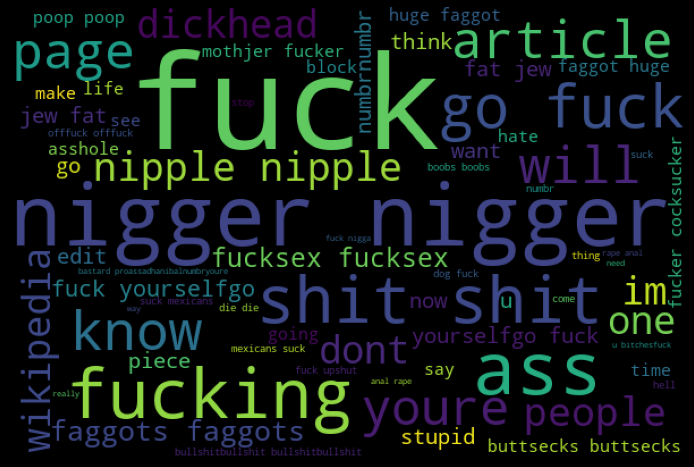

In [56]:
hams=train_df['comment_text'][train_df['rude']==1]
spam_cloud=WordCloud(width=600,height=400,background_color='black',max_words=70).generate(" ".join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=2)
plt.show()

### Highly malignant Shows

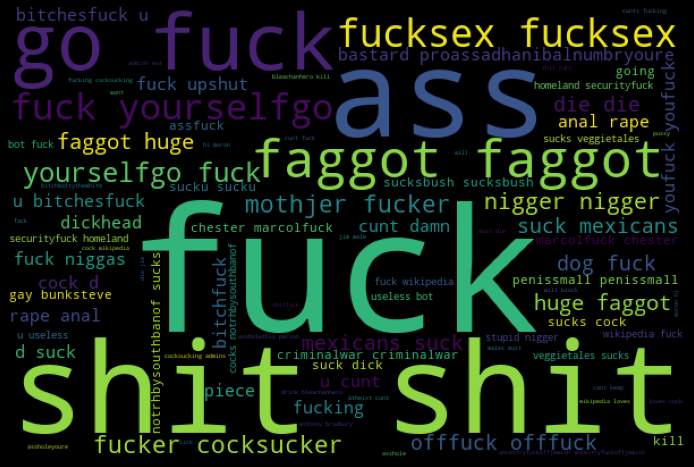

In [57]:
hams=train_df['comment_text'][train_df['highly_malignant']==1]
spam_cloud=WordCloud(width=600,height=400,background_color='black',max_words=90).generate(" ".join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=2)
plt.show()

### Comment Distribution ex: Rude, Malignant

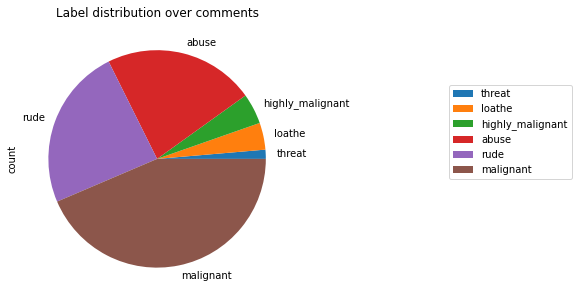

In [58]:
columns=['malignant', 'highly_malignant', 'rude', 'threat','abuse', 'loathe']
traindf_distribution=train_df[columns].sum().to_frame().rename(columns={0:'count'}).sort_values('count')
traindf_distribution.plot.pie(y='count',title='Label distribution over comments',figsize=(8,5)).legend(loc='center',bbox_to_anchor=(1.8,0.6))

### Counts  Stands

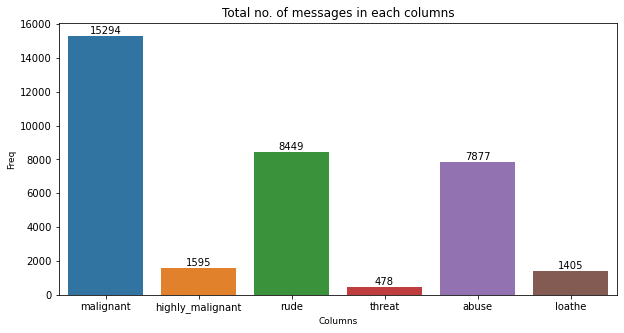

In [59]:
featu=['malignant','highly_malignant','rude','threat','abuse','loathe']

counts=train_df[featu].iloc[:,0:].sum()
counts

# lets plot and visualize count of each columns
plt.figure(figsize=(10,5))
ax=sns.barplot(counts.index,counts.values)
plt.title("Total no. of messages in each columns")
plt.ylabel('Freq', fontsize=9)
plt.xlabel('Columns',fontsize=9)
rects=ax.patches
labels=counts.values
for rect, label in zip(rects, labels):
    height=rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center',va='bottom' )
plt.show()

In [60]:
train_df.columns

Index(['comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe', 'length'],
      dtype='object')

# Replacing all symbols:

### NOTE:

- Segmentation:- Used to draw sentences from paragraph and will draw them into columns.
- Tocanization:- Breaks the sentences into words chunks
- Stopwords:- Removes non essential words or,and ,the are few stop words
- Stemming :- Explaining the meanings are same word(like skip-skiping-skips,skiped), maximum meaningless words are recieved.
- Lemmatization- Lemmatization is a text normalization technique used in Natural Language Processing (NLP) word is meaningful
- Removes Am,Are,I type words 
- Speech tagging- Checks for Noun,Verb,Preposition and

In [61]:
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in string.punctuation))
# adding few more stop words with 
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

train_df['comment_text'] = train_df['comment_text'].apply(lambda x:' '.join(term for term in x.split() if term not in stop_words))

In [62]:
lem= WordNetLemmatizer()
train_df['comment_text']=train_df['comment_text'].apply(lambda x:' '.join(lem.lemmatize(t) for t in x.split()))

In [63]:
train_df['New_length']=train_df['comment_text'].str.len()

In [64]:
train_df.head(5)

comment_text  malignant  \
0  explanationwhy edits made username hardcore me...          0   
1  daww match background colour seemingly stuck t...          0   
2  hey man really trying edit war guy constantly ...          0   
3  morei cant make real suggestion improvement wo...          0   
4                sir hero chance remember page thats          0   

   highly_malignant  rude  threat  abuse  loathe  length  New_length  
0                 0     0       0      0       0     264         180  
1                 0     0       0      0       0     112          91  
2                 0     0       0      0       0     233         141  
3                 0     0       0      0       0     622         381  
4                 0     0       0      0       0      67          35

In [65]:
print("Old Length",train_df['length'].sum(),"New Length",train_df['New_length'].sum())

Old Length 62893130 New Length 40443970


In [66]:
train_df.drop(['length'],axis=1,inplace=True)

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vec=TfidfVectorizer(max_features=1000,stop_words='english')
features=tf_vec.fit_transform(train_df['comment_text'])
x=features

In [68]:
x=features

In [69]:
test_df.head(5)

comment_text
0  Yo bitch Ja Rule is more succesful then you'll...
1  == From RfC == \n\n The title is fine as it is...
2  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3  :If you have a look back at the source, the in...
4          I don't anonymously edit articles at all.

In [70]:
train_df.head(5)

comment_text  malignant  \
0  explanationwhy edits made username hardcore me...          0   
1  daww match background colour seemingly stuck t...          0   
2  hey man really trying edit war guy constantly ...          0   
3  morei cant make real suggestion improvement wo...          0   
4                sir hero chance remember page thats          0   

   highly_malignant  rude  threat  abuse  loathe  New_length  
0                 0     0       0      0       0         180  
1                 0     0       0      0       0          91  
2                 0     0       0      0       0         141  
3                 0     0       0      0       0         381  
4                 0     0       0      0       0          35

# Test Data SET

In [71]:
test_df['comment_text']=test_df['comment_text'].str.lower()
test_df["length"]=test_df["comment_text"].str.len()
#replacing with email address
test_df['comment_text']=test_df['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',"emailaddress")

#replacing with web address                                                   
test_df["comment_text"]= test_df["comment_text"].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\s*)?$',
                                                                 "webaddress")
#replacing with number
test_df["comment_text"]= test_df["comment_text"].str.replace(r'\d+(\.\d+)?',"number")

#remove  punctation
test_df["comment_text"]=test_df["comment_text"].str.replace(r'[^\w\d\s]'," ")

# replace extra space
test_df["comment_text"]=test_df["comment_text"].str.replace(r'^\s+'," ")

#replacing leading and trailing white space
test_df["comment_text"]=test_df["comment_text"].str.replace(r'^\s+|\s+?$', "")

#replacing with\n
test_df["comment_text"]=test_df["comment_text"].str.replace("\n"," ")

# remove stopwords
stop_words = set(stopwords.words('english') + ["m","ur","aww","d","dont","cant","doin","ja","u"])

test_df["comment_text"]= test_df["comment_text"].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words ))

#Lemmatizing is the process of grouping together the inflected forms of a word so they can be analysed as a single item.

lem=WordNetLemmatizer()
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: ' '.join(lem.lemmatize(word) for word in x.split()))

test_df["New_length"] = test_df["comment_text"].str.len() 

test_df.head(5)

comment_text  length  New_length
0  yo bitch rule succesful ever whats hating sad ...     367         221
1                                 rfc title fine imo      50          18
2                         source zawe ashton lapland      54          26
3  look back source information updated correct f...     205         109
4                           anonymously edit article      41          24

In [72]:
print('original length',test_df.length.sum())

print('cleaned length',test_df['New_length'].sum())

original length 55886104
cleaned length 35617170


In [73]:
test_df.drop(['length'],axis=1,inplace=True)

In [74]:
train_df.shape

(159571, 8)

In [75]:
test_df.shape

(153164, 2)

In [76]:
cols_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']

train_df['bad'] =train_df[cols_target].sum(axis =1)
print(train_df['bad'].value_counts())
train_df['bad'] = train_df['bad'] > 0 
train_df['bad'] = train_df['bad'].astype(int)
print(train_df['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


In [77]:
train_df.head(5)

comment_text  malignant  \
0  explanationwhy edits made username hardcore me...          0   
1  daww match background colour seemingly stuck t...          0   
2  hey man really trying edit war guy constantly ...          0   
3  morei cant make real suggestion improvement wo...          0   
4                sir hero chance remember page thats          0   

   highly_malignant  rude  threat  abuse  loathe  New_length  bad  
0                 0     0       0      0       0         180    0  
1                 0     0       0      0       0          91    0  
2                 0     0       0      0       0         141    0  
3                 0     0       0      0       0         381    0  
4                 0     0       0      0       0          35    0

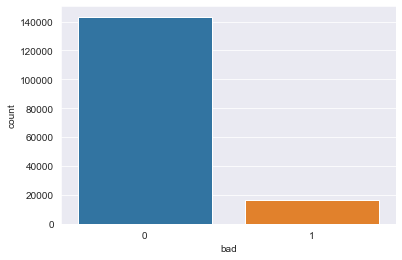

0    143346
1     16225
Name: bad, dtype: int64

In [78]:
sns.set_style("darkgrid")
sns.countplot(x="bad" , data = train_df)
plt.show()
train_df['bad'].value_counts()

### Shape of X and Y 

In [79]:
y=train_df['bad']

In [80]:
print("Shape of X ",x.shape," Shape Y",y.shape)

Shape of X  (159571, 1000)  Shape Y (159571,)


In [81]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x,y=smt.fit_resample(x,y)

0    143346
1    143346
Name: bad, dtype: int64

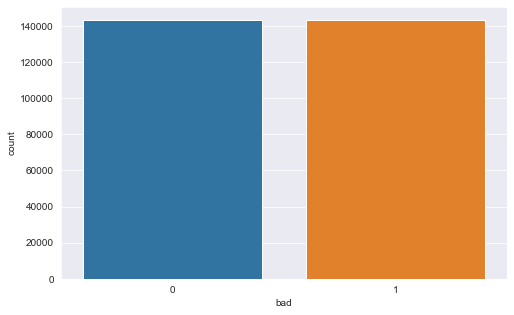

In [82]:
plt.figure(figsize=(8,5))
sns.countplot(x=y)
y.value_counts()

In [83]:
print("Shape of X ",x.shape," Shape Y",y.shape)

Shape of X  (286692, 1000)  Shape Y (286692,)


# Model Building

In [89]:
# linear_model,train test and metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Clssifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

# cross Validation
from sklearn.model_selection import cross_val_score

# Ensamble
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# neural network
from sklearn.neural_network import MLPClassifier

# hyper paramter
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [90]:
lg = LogisticRegression()
dtc= DecisionTreeClassifier()
knn= KNeighborsClassifier()
svc= SVC()
xg = XGBClassifier()
sgd= SGDClassifier()
etc= ExtraTreesClassifier()
rfc= RandomForestClassifier()
ada= AdaBoostClassifier()
gbc= GradientBoostingClassifier()
mlp= MLPClassifier()

In [91]:
models=[lg,dtc,etc,rfc,ada,gbc,xg,knn]

# Train Test 

In [94]:
# Find Train Test

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.20)
    #train and score
    lg.fit(x_train,y_train)
    lg.score(x_train,y_train)
    
    #predict train and test
    pred_train=lg.predict(x_train)
    pred_test=lg.predict(x_test)
    
    # loop
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("The random state:-",i)
        print("Training accuracy_score is ",accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy_score is ",accuracy_score(y_test,pred_test)*100,"\n")

The random state:- 2
Training accuracy_score is  88.09520695172944
Testing accuracy_score is  88.07443450356651 

The random state:- 9
Training accuracy_score is  88.12180350812939
Testing accuracy_score is  88.11629083172012 

The random state:- 10
Training accuracy_score is  88.08779479666715
Testing accuracy_score is  88.11803484539318 

The random state:- 21
Training accuracy_score is  88.13226772704084
Testing accuracy_score is  88.06571443520117 

The random state:- 24
Training accuracy_score is  88.11526337130972
Testing accuracy_score is  88.09187464029719 

The random state:- 26
Training accuracy_score is  88.09651497909337
Testing accuracy_score is  88.08838661295104 

The random state:- 30
Training accuracy_score is  88.12572759022119
Testing accuracy_score is  88.06571443520117 

The random state:- 35
Training accuracy_score is  88.13270373616217
Testing accuracy_score is  88.09885069498945 

The random state:- 36
Training accuracy_score is  88.122675526372
Testing accuracy

In [107]:
# creating new train test split using the random state.
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=9,test_size=0.20)

In [108]:
print("Shape x train ",x_train.shape," x test",x_test.shape)
print("shape y train ",y_train.shape," y_test",y_test.shape)

Shape x train  (229353, 1000)  x test (57339, 1000)
shape y train  (229353,)  y_test (57339,)


# MODEL BUILDING

****************************** 
 LogisticRegression() 
 ******************************
Training Score 0.8803721773859509
Accuracy Training Score = 0.8803721773859509  Accuracy Test Score = 0.8800816198398995 

Training Confusion_Matrix 
 [[100921  13625]
 [ 13812 100995]] Testing Confusion_Matrix 
 [[25316  3484]
 [ 3392 25147]]
Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88     28800
           1       0.88      0.88      0.88     28539

    accuracy                           0.88     57339
   macro avg       0.88      0.88      0.88     57339
weighted avg       0.88      0.88      0.88     57339

 * * * * * 
 MODEL CROSSVALIDATION
A cross-fold  2 CV_mean  0.8773247945530396 Training Score  0.8803721773859509 Testing Score  0.8800816198398995
A cross-fold  3 CV_mean  0.8778061473637213 Training Score  0.8803721773859509 Testing Score  0.8800816198398995
A cross-fold  4 CV_mean  0.8781270492375093 Training Scor

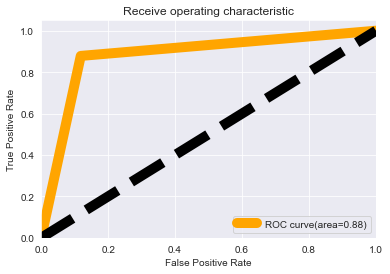

****************************** 
 DecisionTreeClassifier() 
 ******************************
Training Score 0.9824855135969445
Accuracy Training Score = 0.9824855135969445  Accuracy Test Score = 0.918816163518722 

Training Confusion_Matrix 
 [[111415   3131]
 [   886 113921]] Testing Confusion_Matrix 
 [[25627  3173]
 [ 1482 27057]]
Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.89      0.92     28800
           1       0.90      0.95      0.92     28539

    accuracy                           0.92     57339
   macro avg       0.92      0.92      0.92     57339
weighted avg       0.92      0.92      0.92     57339

 * * * * * 
 MODEL CROSSVALIDATION
A cross-fold  2 CV_mean  0.9037887349490046 Training Score  0.9824855135969445 Testing Score  0.918816163518722
A cross-fold  3 CV_mean  0.9134436956734056 Training Score  0.9824855135969445 Testing Score  0.918816163518722
A cross-fold  4 CV_mean  0.9183618656955896 Training Sco

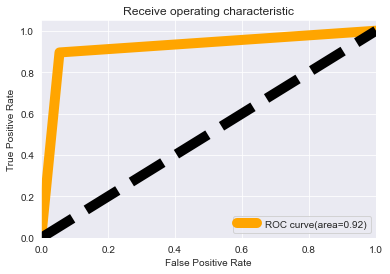

****************************** 
 ExtraTreesClassifier() 
 ******************************
Training Score 0.9824855135969445
Accuracy Training Score = 0.9824855135969445  Accuracy Test Score = 0.9673171837667207 

Training Confusion_Matrix 
 [[111415   3131]
 [   886 113921]] Testing Confusion_Matrix 
 [[27344  1456]
 [  418 28121]]
Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.95      0.97     28800
           1       0.95      0.99      0.97     28539

    accuracy                           0.97     57339
   macro avg       0.97      0.97      0.97     57339
weighted avg       0.97      0.97      0.97     57339

 * * * * * 
 MODEL CROSSVALIDATION
A cross-fold  2 CV_mean  0.9607418414186654 Training Score  0.9824855135969445 Testing Score  0.9673171837667207
A cross-fold  3 CV_mean  0.9658239504415889 Training Score  0.9824855135969445 Testing Score  0.9673171837667207
A cross-fold  4 CV_mean  0.9675993749389589 Training Sc

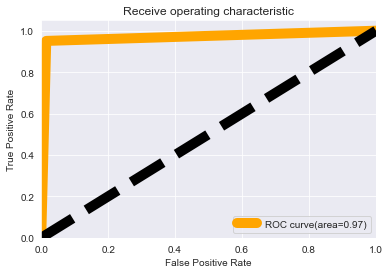

****************************** 
 RandomForestClassifier() 
 ******************************
Training Score 0.9824855135969445
Accuracy Training Score = 0.9824855135969445  Accuracy Test Score = 0.9560159751652453 

Training Confusion_Matrix 
 [[111317   3229]
 [   788 114019]] Testing Confusion_Matrix 
 [[27012  1788]
 [  734 27805]]
Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.94      0.96     28800
           1       0.94      0.97      0.96     28539

    accuracy                           0.96     57339
   macro avg       0.96      0.96      0.96     57339
weighted avg       0.96      0.96      0.96     57339

 * * * * * 
 MODEL CROSSVALIDATION
A cross-fold  2 CV_mean  0.9449409121984569 Training Score  0.9824855135969445 Testing Score  0.9560159751652453
A cross-fold  3 CV_mean  0.9525065226793911 Training Score  0.9824855135969445 Testing Score  0.9560159751652453
A cross-fold  4 CV_mean  0.9556876369065059 Training 

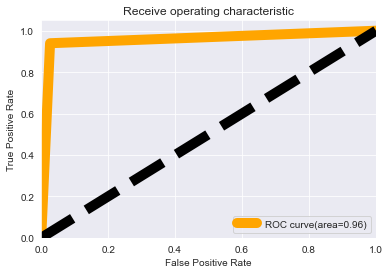

****************************** 
 AdaBoostClassifier() 
 ******************************
Training Score 0.7915135184628063
Accuracy Training Score = 0.7915135184628063  Accuracy Test Score = 0.7902125952667469 

Training Confusion_Matrix 
 [[ 80068  34478]
 [ 13339 101468]] Testing Confusion_Matrix 
 [[20122  8678]
 [ 3351 25188]]
Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.70      0.77     28800
           1       0.74      0.88      0.81     28539

    accuracy                           0.79     57339
   macro avg       0.80      0.79      0.79     57339
weighted avg       0.80      0.79      0.79     57339

 * * * * * 
 MODEL CROSSVALIDATION
A cross-fold  2 CV_mean  0.7986305861342486 Training Score  0.7915135184628063 Testing Score  0.7902125952667469
A cross-fold  3 CV_mean  0.7904231719057386 Training Score  0.7915135184628063 Testing Score  0.7902125952667469
A cross-fold  4 CV_mean  0.7903743390119014 Training Scor

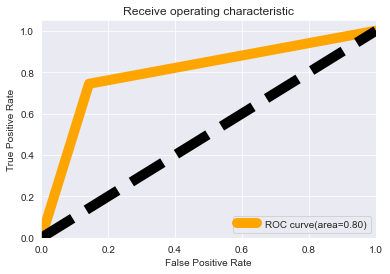

****************************** 
 GradientBoostingClassifier() 
 ******************************
Training Score 0.8184414417949624
Accuracy Training Score = 0.8184414417949624  Accuracy Test Score = 0.8159716772179494 

Training Confusion_Matrix 
 [[89777 24769]
 [16872 97935]] Testing Confusion_Matrix 
 [[22510  6290]
 [ 4262 24277]]
Classification Report 
               precision    recall  f1-score   support

           0       0.84      0.78      0.81     28800
           1       0.79      0.85      0.82     28539

    accuracy                           0.82     57339
   macro avg       0.82      0.82      0.82     57339
weighted avg       0.82      0.82      0.82     57339

 * * * * * 
 MODEL CROSSVALIDATION
A cross-fold  2 CV_mean  0.8146233588659606 Training Score  0.8184414417949624 Testing Score  0.8159716772179494
A cross-fold  3 CV_mean  0.8154221254865849 Training Score  0.8184414417949624 Testing Score  0.8159716772179494
A cross-fold  4 CV_mean  0.8148082262497733 Training 

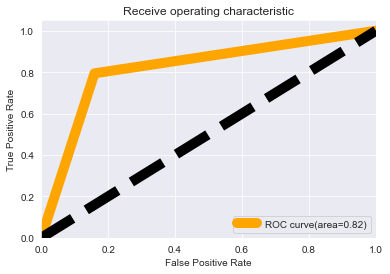

****************************** 
 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...) 
 ******************************
Training Score 0.8932126460085545
Accuracy Training Score = 0.8932126460085545  Accuracy Test Score = 0.8833778056819965 

Training Confusion_Matrix 
 [[102882  11664]
 [ 12828 101979]] Testing Confusion_Matrix 
 [[25610  3190]
 [ 3497

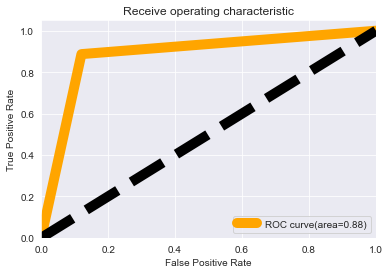

****************************** 
 KNeighborsClassifier() 
 ******************************
Training Score 0.692391204824005
Accuracy Training Score = 0.692391204824005  Accuracy Test Score = 0.6557840213467273 

Training Confusion_Matrix 
 [[ 45604  68942]
 [  1609 113198]] Testing Confusion_Matrix 
 [[ 9553 19247]
 [  490 28049]]
Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.33      0.49     28800
           1       0.59      0.98      0.74     28539

    accuracy                           0.66     57339
   macro avg       0.77      0.66      0.62     57339
weighted avg       0.77      0.66      0.62     57339

 * * * * * 
 MODEL CROSSVALIDATION
A cross-fold  2 CV_mean  0.6453371562513079 Training Score  0.692391204824005 Testing Score  0.6557840213467273
A cross-fold  3 CV_mean  0.654221254865849 Training Score  0.692391204824005 Testing Score  0.6557840213467273
A cross-fold  4 CV_mean  0.6553025546579605 Training Score  

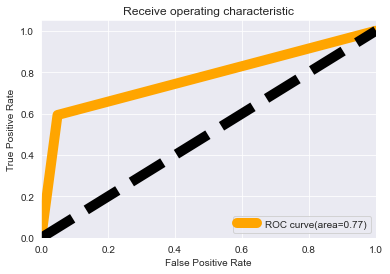

In [109]:
for m in models:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    
    #result
    print("******"*5,"\n",m,"\n","******"*5)
    print("Training Score",score)
    print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
    print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
    print("Classification Report \n",classification_report(y_test,pred_test))
    
    print(" *"*5,"\n MODEL CROSSVALIDATION")
    
    #train test Accuracy
    train_accuracy=accuracy_score(y_train,pred_train)
    test_accuracy =accuracy_score(y_test,pred_test)

    #Range finding cv Score
    for i in range(2,6):
        cv_score=cross_val_score(m,x,y,cv=i)
        cv_mean=cv_score.mean()
        print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)
    
    # graph
    
    from sklearn.metrics import roc_curve,auc

    fpr,tpr,thresholds= roc_curve(pred_test,y_test)
    roc_auc =auc(fpr,tpr)

    plt.figure()
    plt.plot(fpr,tpr,color='orange',lw=10,label='ROC curve(area=%0.2f)' % roc_auc)

    plt.plot([0,1],[0,1],color='black',lw=10,linestyle='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receive operating characteristic")
    plt.legend(loc="lower right")
    plt.show()

# From the above observation 
## Selected Extra-Trees, Random-Forest for Hyper-Parameter Tunning as these models Works the best with better accuracy, and better F1 score.

### Random Forest 

- Cross-Fold  5
- CV_mean  0.96
- Training Score  0.98
- Testing Score  0.96

###  Extra Trees
- Cross-Fold  5 
- CV_mean  0.97
- Training Score  0.98
- Testing Score  0.97



# Hyper-Parameter - Random Forest Classifier

In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc= RandomForestClassifier()

#Parameter  
parameters={'n_estimators':[100,180],
            'criterion':['gini'],
           'max_features':['sqrt']}

gsv=GridSearchCV(rfc,parameters,verbose=1,cv=5)
gsv.fit(x_train,y_train)

print("Best Parameter ",gsv.best_params_,"Best Score ",gsv.best_score_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Parameter  {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 180} Best Score  0.9521218448849817


## Model : Random Forest Classifier

In [115]:
#random Forest Training and score
rfc=RandomForestClassifier(n_estimators=200, criterion='gini', max_features='sqrt')
rfc.fit(x_train,y_train)
rfc_score=rfc.score(x_train,y_train)

#predict random Forest
pred_train1=rfc.predict(x_train)
pred_test1=rfc.predict(x_test)
      
#result random Forest
print("Model Score ",rfc_score)
print("Accuracy Training Score ",accuracy_score(y_train,pred_train1)," Accuracy Test Score ",accuracy_score(y_test,pred_test1),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train1)," \nTesting Confusion_Matrix",confusion_matrix(y_test,pred_test1))
print("Classification Report \n",classification_report(y_test,pred_test1))

Model Score  0.9824244723199609
Accuracy Training Score  0.9824244723199609  Accuracy Test Score  0.9571147037792777 

Training Confusion_Matrix 
 [[111316   3230]
 [   801 114006]]  
Testing Confusion_Matrix [[27022  1778]
 [  681 27858]]
Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.94      0.96     28800
           1       0.94      0.98      0.96     28539

    accuracy                           0.96     57339
   macro avg       0.96      0.96      0.96     57339
weighted avg       0.96      0.96      0.96     57339



## Cross Validation

### Model Cross Validation

In [120]:
#Accuracy_Score
train_accuracy=accuracy_score(y_train,pred_train1)
test_accuracy=accuracy_score(y_test,pred_test1)

#cross val
for i in range(2,6):
    cv_score=cross_val_score(rfc,x,y,cv=i)
    cv_mean=cv_score.mean()
    
    #print
    print("A cross-fold ",i,"CV_Score ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_Score  0.9454780740306671 Training Score  0.9824855135969445 Testing Score  0.955928774481592
A cross-fold  3 CV_Score  0.9532704086615601 Training Score  0.9824855135969445 Testing Score  0.955928774481592
A cross-fold  4 CV_Score  0.9562317748664071 Training Score  0.9824855135969445 Testing Score  0.955928774481592
A cross-fold  5 CV_Score  0.9577456303662597 Training Score  0.9824855135969445 Testing Score  0.955928774481592


### Model Graph

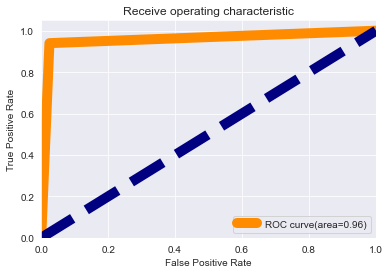

In [121]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds= roc_curve(pred_test1,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area=%0.2f)' % roc_auc)

plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receive operating characteristic")
plt.legend(loc="lower right")
plt.show()

# Random Forest working the best at an accuracy of +95%

# Saving Model

In [122]:
import pickle
filename='malignant.pkl'
pickle.dump(rfc,open(filename,'wb'))

In [123]:
# loading pack file
pickled_model= pickle.load(open(filename,'rb'))
result=pickled_model.score(x_test,y_test)
result*100

95.71147037792777

In [124]:
array=np.array(y_test)
conclude=pd.DataFrame([pickled_model.predict(x_test)[:],array[:]],index=['Predicted','Original'])
conclude

0      1      2      3      4      5      6      7      8      \
Predicted      0      0      0      1      0      0      1      0      0   
Original       0      0      0      1      0      0      1      0      0   

           9      10     11     12     13     14     15     16     17     \
Predicted      1      1      1      0      1      1      1      0      0   
Original       1      1      1      0      0      1      1      0      0   

           18     19     20     21     22     23     24     25     26     \
Predicted      1      0      0      1      0      0      1      0      1   
Original       1      1      0      1      0      0      1      0      1   

           27     28     29     30     31     32     33     34     35     \
Predicted      1      1      1      0      1      1      1      1      0   
Original       1      1      1      0      0      1      1      1      0   

           36     37     38     39     40     41     42     43     44     \
Predicted      0      1      0      0      0      0      1      0      1   
Original       0      1      0      0      0      0      0      0      0   

           45     46     47     48     49     50     51     52     53     \
Predicted      0      1      1      1      0      0      1      1      1   
Original       0      1      1      1      0      0      1      1      1   

           54     55     56     57     58     59     60     61     62     \
Predicted      1      0      1      0      0      0      0      1      1   
Original       1      0      1      0      1      0      0      1      1   

           63     64     65     66     67     68     69     70     71     \
Predicted      1      1      0      0      0      0      0      0      0   
Original       1      1      0      0      0      0      1      0      0   

           72     73     74     75     76     77     78     79     80     \
Predicted      0      1      1      0      1      0      1      1      0   
Original       0      1      1      0      1      0      1      1      0   

           81     82     83     84     85     86     87     88     89     \
Predicted      0      1      1      1      0      0      0      1      0   
Original       0      1      1      1      0      0      0      1      0   

           90     91     92     93     94     95     96     97     98     \
Predicted      1      0      1      1      0      1      1      0      1   
Original       1      0      0      0      0      1      1      0      1   

           99     100    101    102    103    104    105    106    107    \
Predicted      1      1      1      0      1      1      0      1      0   
Original       1      1      1      0      0      1      0      1      0   

           108    109    110    111    112    113    114    115    116    \
Predicted      1      1      1      1      0      0      1      0      1   
Original       1      1      1      1      0      0      1      0      1   

           117    118    119    120    121    122    123    124    125    \
Predicted      0      0      0      0      0      1      1      0      0   
Original       0      0      0      0      0      1      1      0      0   

           126    127    128    129    130    131    132    133    134    \
Predicted      0      1      1      1      1      0      0      1      1   
Original       0      1      1      1      1      0      0      1      1   

           135    136    137    138    139    140    141    142    143    \
Predicted      1      0      1      1      0      1      1      0      1   
Original       1      0      1      1      0      1      1      0      1   

           144    145    146    147    148    149    150    151    152    \
Predicted      0      1      1      0      0      0      1      0      1   
Original       0      1      1      0      0      0      1      0      1   

           153    154    155    156    157    158    159    160    161    \
Predicted      1      1      0      1     

# Verification with Testing Model

In [125]:
#test data (comments) converted to vectors
testing_data = tf_vec.fit_transform(test_df["comment_text"])

#applying testing on test data set
prediction=rfc.predict(testing_data)
prediction

test_df['label'] = prediction

In [126]:
test_df.head(5)

comment_text  New_length  label
0  yo bitch rule succesful ever whats hating sad ...         221      0
1                                 rfc title fine imo          18      0
2                         source zawe ashton lapland          26      0
3  look back source information updated correct f...         109      0
4                           anonymously edit article          24      0

In [127]:
test_df.to_csv('Test_Malignant.csv',index=False)# removing index